In [1]:
import matplotlib.pyplot as plt
from visualisations import show_task

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%matplotlib inline

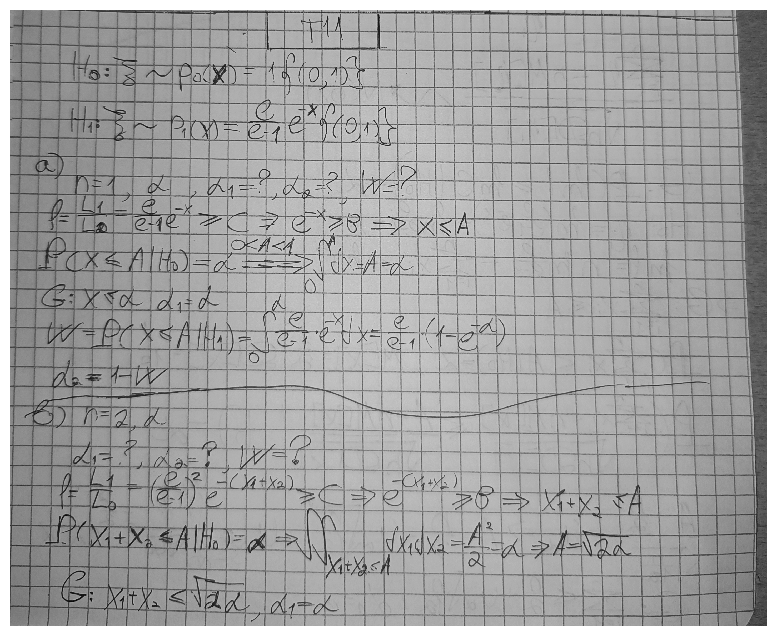

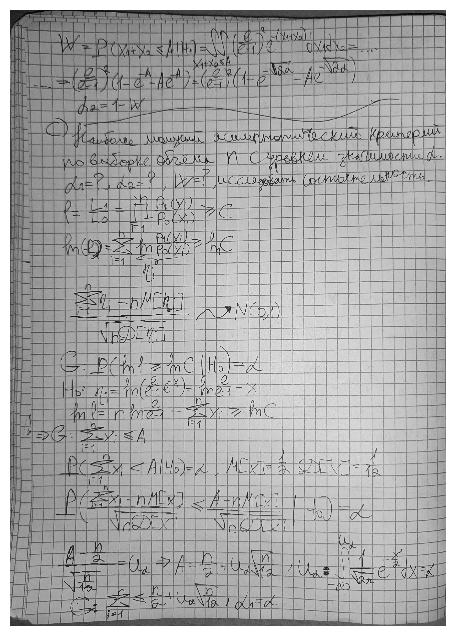

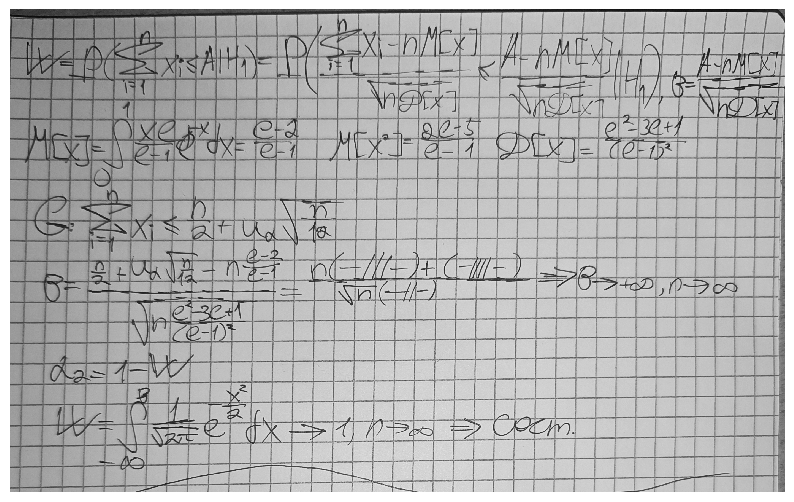

In [2]:
show_task("T11")